In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the food data (food.csv)
food_data = pd.read_csv('/food.csv')
# Load the user_nutritional_data.csv file
user_nutritional_data = pd.read_csv('/user_nutritional_data.csv')

In [ ]:
print("Food Data:")
print(food_data.head())

Food Data:
              Food  Breakfast  Lunch  Dinner  Diet  Calories  Fats  Proteins  \
0          Almonds          1      0       0     0       579  50.0      21.0   
1      Aloo Matar           0      1       1     0        81   0.4       5.4   
2       aloo Tikki          0      1       1     0        22   0.2       2.4   
3  American cheese          1      0       0     0       331  24.0      20.0   
4           Apples          1      0       0     0        52   0.2       0.3   

   Iron  Calcium  Sodium  Potassium  Carbohydrates  Fibre  VitaminD  Sugars  \
0  3.71    269.0       1      733.0           22.0   13.0         0     4.4   
1  1.47     25.0       5      244.0           14.0    5.7         0     5.7   
2  0.91     23.0      14      224.0            4.1    2.0         0     1.3   
3  0.84    497.0     966      363.0            8.3    0.0         0     0.0   
4  0.12      6.0       1      107.0           14.0   24.0         0    10.0   

    Category  
0  Breakfast  
1  

In [ ]:
print("\nUser Nutritional Data:")
print(user_nutritional_data.head())


User Nutritional Data:
   Gender  Age  Daily meals frequency  Physical exercise  Height  Weight  \
0       0   29                      3                  0     165   101.0   
1       1   25                      3                  4     165    53.0   
2       0   23                      2                  0     170    70.0   
3       0   22                      3                  0     168   112.0   
4       0   19                      3                  2     175    67.0   

       BMR    Carbs  Proteins    Fats  Calories        BMI  
0  1901.25  285.188   114.075  76.050  2281.502  37.098255  
1  1275.25  302.872   121.149  80.766  2422.978  19.467401  
2  1652.50  247.875    99.150  66.100  1983.000  24.221453  
3  2065.00  309.750   123.900  82.600  2478.000  39.682540  
4  1673.75  324.289   129.716  86.477  2594.313  21.877551  


In [ ]:
# Set the option to display all columns
pd.options.display.max_columns = None

In [ ]:
# Check for missing values
print(food_data.isnull().sum())
print(user_nutritional_data.isnull().sum())

Food_items       0
Breakfast        0
Lunch            0
Dinner           0
Diet             0
Calories         0
Fats             0
Proteins         0
Iron             0
Calcium          0
Sodium           0
Potassium        0
Carbohydrates    0
Fibre            0
VitaminD         0
Sugars           0
dtype: int64
Gender                   0
Age                      0
Daily meals frequency    0
Physical exercise        0
Height                   0
Weight                   0
BMR                      0
Carbs                    0
Proteins                 0
Fats                     0
Calories                 0
BMI                      0
dtype: int64


In [ ]:
food_data = food_data.dropna()
user_nutritional_data = user_nutritional_data.dropna()
print(food_data)
print(user_nutritional_data)
print(food_data.describe())
print(user_nutritional_data.describe())

            Food_items  Breakfast  Lunch  Dinner  Diet  Calories  Fats  \
0              Almonds          1      0       0     0       579  50.0   
1          Aloo Matar           0      1       1     0        81   0.4   
2           aloo Tikki          0      1       1     0        22   0.2   
3      American cheese          1      0       0     0       331  24.0   
4               Apples          1      0       0     0        52   0.2   
..                 ...        ...    ...     ...   ...       ...   ...   
138            Uttapam          1      1       1     0       188   7.2   
139  Vanilla Ice cream          0      0       1     0       207  11.0   
140          Veg Pizza          0      0       1     0       298  14.0   
141         White Rice          0      1       1     0       360   0.6   
142             Yogurt          1      1       1     0        60   4.0   

     Proteins   Iron  Calcium  Sodium  Potassium  Carbohydrates  Fibre  \
0        21.0   3.71    269.0       1

In [ ]:
food_data.fillna(0, inplace=True)

In [ ]:
Q1 = user_nutritional_data.quantile(0.25)
Q3 = user_nutritional_data.quantile(0.75)
IQR = Q3 - Q1
user_nutritional_data = user_nutritional_data[~((user_nutritional_data < (Q1 - 1.5 * IQR)) | (user_nutritional_data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
user_nutritional_data['Gender'] = user_nutritional_data['Gender'].astype('category')
user_nutritional_data['Age'] = user_nutritional_data['Age'].astype(int)  # Assuming age is an integer
user_nutritional_data['Height'] = user_nutritional_data['Height'].astype(float)
user_nutritional_data['Weight'] = user_nutritional_data['Weight'].astype(float)
user_nutritional_data['Calories'] = user_nutritional_data['Calories'].astype(float)

In [ ]:
# Step 1: Define feature columns (X) and target column (y)
# Example: Predict 'Calories' based on other features like 'Age', 'Weight', 'Height', 'Gender'
X = user_nutritional_data[['Gender', 'Age', 'Height', 'Weight', 'BMR', 'Carbs', 'Proteins', 'Fats']]
y = user_nutritional_data['Calories']

# Step 2: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=user_nutritional_data['Gender'])

# Step 3: Standardize/normalize features (optional but often useful for some models like neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train a RandomForestRegressor (as an example model)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [ ]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)

# Step 6: Evaluate the model using metrics like RMSE and R2 score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")

Root Mean Squared Error (RMSE): 4.043625774266815
R-squared (R2 Score): 0.9998712830355899


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 64 neurons, input_dim matches the number of features

# Second hidden layer
model.add(Dense(32, activation='relu'))  # 32 neurons in this hidden layer

# Output layer
model.add(Dense(1))  # One neuron since this is a regression task (predicting Calories)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32)

# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (Mean Squared Error): {loss}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4063214.5000 - val_loss: 4071861.7500
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3972158.5000 - val_loss: 4034680.5000
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3997924.5000 - val_loss: 3934836.7500
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3849954.5000 - val_loss: 3729016.0000
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3580705.5000 - val_loss: 3388481.5000
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3182138.0000 - val_loss: 2918091.0000
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2665269.5000 - val_loss: 2368101.7500
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2096885.3750 - val_loss: 1811853.1250
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1582468.2500 - val_loss: 1341420.8750
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1164031.5000 - val_loss: 1015581.9375
Epoch 11/100
45/45 ━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3948354.5000 - val_loss: 4063390.7500
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3961853.2500 - val_loss: 3997076.2500
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3806783.5000 - val_loss: 3820373.7500
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3641401.5000 - val_loss: 3474125.2500
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3293869.0000 - val_loss: 2943090.2500
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2716257.0000 - val_loss: 2289755.5000
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2031564.0000 - val_loss: 1646101.8750
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1388117.5000 - val_loss: 1146086.6250
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1005601.9375 - val_loss: 870051.4375
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 772448.0000 - val_loss: 751826.1875
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - l

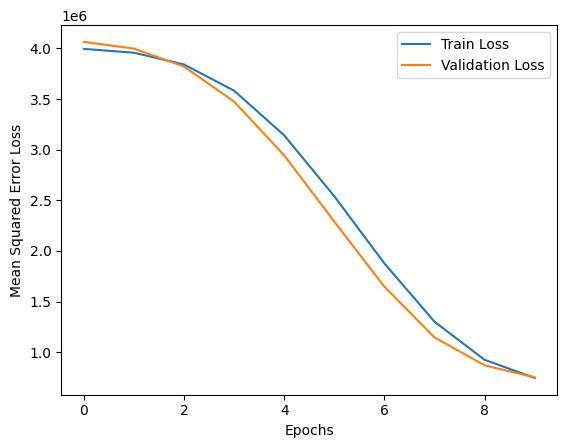

In [ ]:
# Split the data into features (X) and target (y) for prediction (e.g., predicting 'Calories')
X = user_nutritional_data[['Gender', 'Age', 'Height', 'Weight', 'BMR', 'Carbs', 'Proteins', 'Fats']]
y = user_nutritional_data['Calories']

# Split into training and testing datasets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=user_nutritional_data['Gender'])

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential()

# Input and first hidden layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # 64 neurons, input_dim matches the number of features

# Second hidden layer
model.add(Dense(32, activation='relu'))  # 32 neurons in this hidden layer

# Output layer (for regression task)
model.add(Dense(1))  # One neuron since this is a regression task (predicting Calories)

# Compile the model with the Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Display the model structure
model.summary()

# Train the model (Preliminary testing)
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=32)

# Evaluate the model on the test dataset
test_loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (Mean Squared Error): {test_loss}")

# Plot training and validation loss over epochs (Optional: for visual analysis)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

In [ ]:
# Rename 'Food_items' to 'Food' if it contains food names
food_data = food_data.rename(columns={'Food_items': 'Food'})  # Assuming 'Food_items' contains food names

# Adding a 'Category' column based on existing columns (Breakfast, Lunch, Dinner)
food_data['Category'] = food_data[['Breakfast', 'Lunch', 'Dinner']].idxmax(axis=1)

In [ ]:
Gender = input("Enter Gender (Male/Female): ")
Age = int(input("Enter Age: "))
Height = float(input("Enter Height (in cm): "))
Weight = float(input("Enter Weight (in kg): "))
BMR = int(input("Enter Basal Metabolic Rate: "))
Condition = input("Enter Conditions Listed Below \nWeight Loss \nWeight Gain \nDiabetes \nHeart Condition \nBlood Pressure): ")
Diet = input("Enter Diet (Veg/Non-Veg): ")

# Calculate BMI
# Formula: BMI = weight (kg) / (height (m))^2
height_in_meters = Height / 100  # Convert cm to m
BMI = round(Weight / (height_in_meters ** 2), 2)

user_input = {
    'Gender': Gender,
    'Age': Age,
    'Height': Height,
    'Weight': Weight,
    'BMR': BMR,
    'Condition': Condition,
    'Diet': Diet,
    'BMI': BMI  # Add calculated BMI to the dictionary
}

print(f"Calculated BMI: {BMI}")
print("User input:", user_input)

Enter Gender (Male/Female): Male
Enter Age: 22
Enter Height (in cm): 183
Enter Weight (in kg): 95
Enter Basal Metabolic Rate: 1650
Enter Conditions Listed Below 
Weight Loss 
Weight Gain 
Diabetes 
Heart Condition 
Blood Pressure): Blood Pressure
Enter Diet (Veg/Non-Veg): Veg
Calculated BMI: 28.37
User input: {'Gender': 'Male', 'Age': 22, 'Height': 183.0, 'Weight': 95.0, 'BMR': 1650, 'Condition': 'Blood Pressure', 'Diet': 'Veg', 'BMI': 28.37}


In [ ]:
# Function to recommend food based on health condition and diet preference
def recommend_food(user_input, food_data, meal_category):
    condition = user_input['Condition']
    diet_preference = user_input['Diet']

    # Filter by meal category
    category_filtered = food_data[food_data['Category'] == meal_category]

    # Apply diet preference filter (assuming 'Veg' column exists: 1 for veg, 0 for non-veg)
    if diet_preference == 'Veg':
        category_filtered = category_filtered[category_filtered['Diet'] == 0]
    elif diet_preference == 'Non-Veg':
        category_filtered = category_filtered[category_filtered['Diet'] == 1]

    # Condition-based filters
    if condition == 'Diabetes':
        recommended_foods = category_filtered[category_filtered['Sugars'] < 5]
    elif condition == 'Heart Condition':
        recommended_foods = category_filtered[category_filtered['Fats'] < 10]
    elif condition == 'Weight Loss':
        recommended_foods = category_filtered[category_filtered['Calories'] < 400]  # Low-calorie foods
    elif condition == 'Weight Gain':
        recommended_foods = category_filtered[category_filtered['Calories'] > 600]  # High-calorie foods
    elif condition == 'Blood Pressure':
        if 'Sodium' in category_filtered.columns:
            recommended_foods = category_filtered[category_filtered['Sodium'] < 150]  # Low-sodium foods
        else:
            recommended_foods = pd.DataFrame()  # No recommendation if 'Sodium' data isn't available
    else:
        recommended_foods = category_filtered[category_filtered['Calories'] <= user_input['BMR'] / 3]

    return recommended_foods

In [ ]:
# Function to recommend meals for an entire week (3 times a day, with at least 3 items per meal)
def recommend_weekly_meals(user_input, food_data):
    meals = ['Breakfast', 'Lunch', 'Dinner']
    weekly_menu = {}

    # Loop through 7 days of the week
    for day in range(1, 8):
        day_menu = {}

        # Recommend meals for breakfast, lunch, and dinner
        for meal in meals:
            meal_recommendations = recommend_food(user_input, food_data, meal)

            if not meal_recommendations.empty:
                # Select up to 3 items randomly for each meal (or as many as available)
                recommended_meals = meal_recommendations.sample(n=min(3, len(meal_recommendations)), random_state=day)
                day_menu[meal] = [
                    {
                        'Food': meal_item['Food'],
                        'Sugars': meal_item.get('Sugars', 'N/A'),
                        'Carbs': meal_item.get('Carbs', 'N/A'),
                        'Proteins': meal_item.get('Proteins', 'N/A'),
                        'Fats': meal_item.get('Fats', 'N/A'),
                        'Calories': meal_item.get('Calories', 'N/A'),
                        'Sodium': meal_item.get('Sodium', 'N/A') if 'Sodium' in meal_item else 'N/A'
                    }
                    for _, meal_item in recommended_meals.iterrows()
                ]
            else:
                day_menu[meal] = 'No suitable meal found'

        # Add the day menu to the weekly menu
        weekly_menu[f'Day {day}'] = day_menu

    return weekly_menu

In [ ]:
# Get recommendations for the week
weekly_meals = recommend_weekly_meals(user_input, food_data)

# Display the weekly meal plan
for day, meals in weekly_meals.items():
    print(f"\n{day}'s Meal Plan:")
    for meal, details in meals.items():
        if isinstance(details, list):
            print(f"{meal}:")
            for idx, item in enumerate(details, start=1):
                print(f"  {idx}. {item['Food']} (Sugars: {item['Sugars']}g, Carbs: {item['Carbs']}g, Proteins: {item['Proteins']}g, Fats: {item['Fats']}g, Calories: {item['Calories']} kcal, Sodium: {item['Sodium']}mg)")
        else:
            print(f"{meal}: {details}")


Day 1's Meal Plan:
Breakfast:
  1. Greek yogurt plain (Sugars: 3.6g, Carbs: N/Ag, Proteins: 10.0g, Fats: 1.9g, Calories: 73 kcal, Sodium: 34mg)
  2. Laal Chai (Sugars: 0.0g, Carbs: N/Ag, Proteins: 0.2g, Fats: 0.0g, Calories: 1 kcal, Sodium: 1mg)
  3. Banana Chips (Sugars: 35.0g, Carbs: N/Ag, Proteins: 2.3g, Fats: 34.0g, Calories: 519 kcal, Sodium: 6mg)
Lunch:
  1. Baati (Sugars: 0.6g, Carbs: N/Ag, Proteins: 3.8g, Fats: 0.5g, Calories: 25 kcal, Sodium: 56mg)
  2. Chowmein (Sugars: 0.0g, Carbs: N/Ag, Proteins: 1.8g, Fats: 0.2g, Calories: 108 kcal, Sodium: 19mg)
  3. Brown Rice (Sugars: 0.0g, Carbs: N/Ag, Proteins: 7.5g, Fats: 2.7g, Calories: 362 kcal, Sodium: 4mg)
Dinner:
  1. Vanilla Ice cream (Sugars: 21.0g, Carbs: N/Ag, Proteins: 3.5g, Fats: 11.0g, Calories: 207 kcal, Sodium: 80mg)
  2. Dark chocolates (Sugars: 48.0g, Carbs: N/Ag, Proteins: 5.5g, Fats: 32.0g, Calories: 556 kcal, Sodium: 6mg)
  3. Chocolate Icecream (Sugars: 25.0g, Carbs: N/Ag, Proteins: 3.8g, Fats: 11.0g, Calories: 2